##HW 7 
Ernesto Barraza-Valdez
Plasma 3

Just python junk below

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as plticker
from matplotlib.ticker import FixedFormatter, FixedLocator
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
import random
import pandas as pd
from ipywidgets import interactive
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

Constants

In [ ]:
q = 1.6*10**(-19)
eps = 8.85e-12
m = 9.1e-31
amu = 1.66e-27
mi = 12*amu
c = 2.998e8
kboltz = 1.38e-23
kboltzKtoEV = 8.61e-5
JtoeV = 1/(1.6e-19)

## 1) 

Given 

$v_{particle} = 10^7 \: m/s$

$ \omega = 10^{10} \: rad/s $

$\phi = 1 V$

Then for a resonant particle we can calculate the necessary wave number: 

$$\begin{align}
\frac{\omega}{k} = v_{particle} \rightarrow k = \omega/v_{particle}
\end{align}$$

In [ ]:
vpart = 1e7
w = 1e10

k = w/vpart
print(k)

1000.0


Then according to equation (8.44) in Swanson the bounce frequency is: 

$$\begin{align}
\omega_B = \sqrt{e k^2 \: \phi_0/m}
\end{align}$$

In [ ]:
wb = np.sqrt(q*k**2 *1/m)
print("{:e}".format(wb))

4.193139e+08


## 2

##**2a**

**z** - longitudinal position (parallel to B-field)

**$\phi$** - the phase about the gyrocenter

**$p_z$** - particle momentum in longitudinal direction (parallel to B-field)

**$\rho$** - gyroradius

**$\epsilon$** - stochastic parameter 

**$k_\perp$** - wavenumber perpendicular to B-field

##2b

Define differential equation system

In [ ]:

def Stoch(t,X):
    """Return the derivatives x, dxdt, y, dydt to the ODE solved."""
    #efine constants
    eps = 0.01
    kperp = 1
    m, q = 1.6*10**(-27), 1.6*10**(-19)
    qom = q / m
    #initial conditionsz
    [z, phi, pz, rho] = X
    #System of diffeqs 
    kai = z - kperp * rho * np.sin(phi)
    zdot = pz
    phidot = 1- eps* kperp / rho *np.sin(phi)*np.cos(kai)
    pzdot = -eps* np.cos(kai)
    #pphidot = eps* kperp * rho * np.cos(phi) * np.cos(kai)
    rhodot = eps * kperp * np.cos(phi) * np.cos(kai)
    #return derivatives to be integrated
    return [zdot, phidot, pzdot, rhodot]

Numerical calculation

In [ ]:
dt = 10**-4
N = 1500000
tmax = (N-1)*dt
t = np.linspace(0, tmax, N)
tspan = (0.0,tmax)
# Initial particle position and velocity.

pzz = [-1.15, -0.85, -0.5, -0.15, 0.15, 0.50, 0.85, 1.15]

results = []

for pzzz in pzz:

  z0, phi0, pz0, rho0 = (0, 0,pzzz, 1.48)

  X = (z0, phi0, pz0, rho0)
  results.append( solve_ivp(Stoch, tspan, X,method='LSODA',t_eval=t))

**RESULTS**

In [ ]:
zz = [results[i].y[0] for i in range(len(results))]

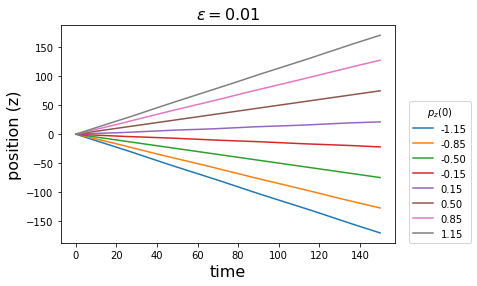

In [ ]:
for i in range(len(zz)):
  plt.plot(results[0].t, zz[i],label="%1.2f"%(pzz[i]))

plt.xlabel("time",fontsize=16)
plt.ylabel("position (z)",fontsize=16)
plt.title("$\epsilon = 0.01$", fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")


In [ ]:
pphi = [results[i].y[1] for i in range(len(results))]

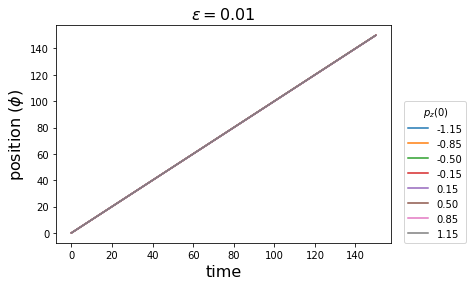

In [ ]:
for i in range(len(pphi)):
  plt.plot(results[0].t, pphi[i],label="%1.2f"%(pzz[i]))

plt.xlabel("time",fontsize=16)
plt.ylabel("position ($\phi$)",fontsize=16)
plt.title("$\epsilon = 0.01$", fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

In [ ]:
ppz = [results[i].y[2] for i in range(len(results))]

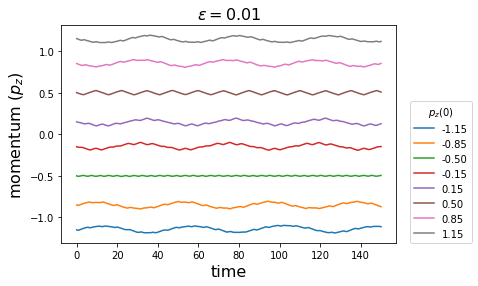

In [ ]:
for i in range(len(ppz)):
  plt.plot(results[0].t, ppz[i],label="%1.2f"%(pzz[i]))

plt.xlabel("time",fontsize=16)
plt.ylabel("momentum ($p_z$)",fontsize=16)
plt.title("$\epsilon = 0.01$", fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

In [ ]:
rrho = [results[i].y[3] for i in range(len(results))]

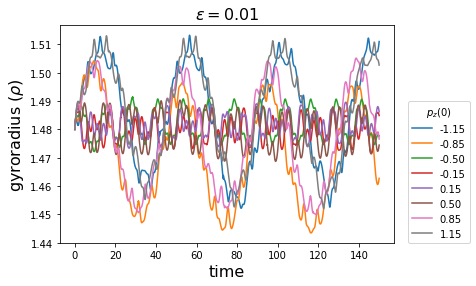

In [ ]:
for i in range(len(rrho)):
  plt.plot(results[0].t, rrho[i],label="%1.2f"%(pzz[i]))

plt.xlabel("time",fontsize=16)
plt.ylabel("gyroradius ($ \\rho $)",fontsize=16)
plt.title("$\epsilon = 0.01$", fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

##2c 

Phase Space Plot

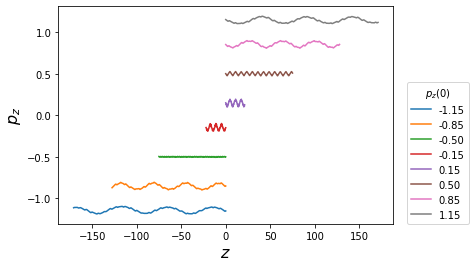

In [ ]:
for i in range(len(zz)):
  plt.plot(zz[i], ppz[i],label="%1.2f"%(pzz[i]))

plt.xlabel("$z$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 0.01$", fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

##2d

Poincare Plot

In [ ]:
dt = results[0].t[1] -results[0].t[0]
Dt = 1/dt

N = len(results[0].y[0])
ntot = int(N/Dt)

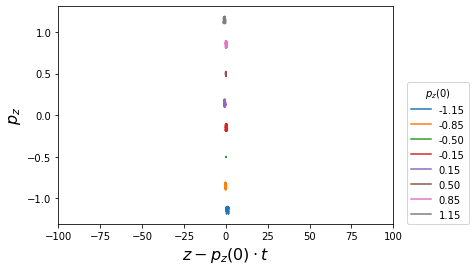

In [ ]:
ind = [int(i*Dt) for i in range(ntot)]

pzzz = []
zzzz = []

for i in range(len(ppz)):
  pzzz.append(ppz[i][ind])
  zzzz.append(zz[i][ind]-ppz[i][0]*results[0].t[ind])

for i in range(len(zzzz)):
  plt.plot(zzzz[i], pzzz[i],label="%1.2f"%(pzz[i]))

plt.xlim([-100,100])
plt.xlabel("$z - p_z(0)\cdot t$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 0.01$", fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

## **2e**

Now changing $\epsilon = 0.025$ rather than 0.01

In [ ]:

def Stoch(t,X, eps):
    """Return the derivatives x, dxdt, y, dydt to the ODE solved."""
    #efine constants
    #eps = 0.0212
    kperp = 1
    m, q = 1.6*10**(-27), 1.6*10**(-19)
    qom = q / m
    #initial conditionsz
    [z, phi, pz, rho] = X
    #System of diffeqs 
    kai = z - kperp * rho * np.sin(phi)
    zdot = pz
    phidot = 1- eps* kperp / rho *np.sin(phi)*np.cos(kai)
    pzdot = -eps* np.cos(kai)
    #pphidot = eps* kperp * rho * np.cos(phi) * np.cos(kai)
    rhodot = eps * kperp * np.cos(phi) * np.cos(kai)
    #return derivatives to be integrated
    return [zdot, phidot, pzdot, rhodot]

In [ ]:
dt = 10**-4
N = 1500000
tmax = (N-1)*dt
t = np.linspace(0, tmax, N)
tspan = (0.0,tmax)
# Initial particle position and velocity.

pzz = [-1.15, -0.85, -0.5, -0.15, 0.15, 0.50, 0.85, 1.15]
eps = [0.025]

results = []
resultse = []

for e in eps:
  for pzzz in pzz:

    z0, phi0, pz0, rho0 = (0, 0,pzzz, 1.48)

    X = (z0, phi0, pz0, rho0)
    results.append( solve_ivp(Stoch, tspan, X,method='LSODA',t_eval=t, args=[e]))
  
  resultse.append(results)
  results = []

In [ ]:
zz = [resultse[0][i].y[0] for i in range(len(resultse[0]))]
pphi = [resultse[0][i].y[1] for i in range(len(resultse[0]))]
ppz = [resultse[0][i].y[2] for i in range(len(resultse[0]))]
rrho = [resultse[0][i].y[3] for i in range(len(resultse[0]))]

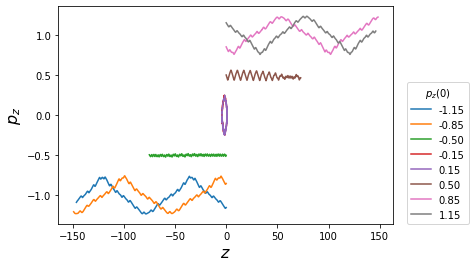

In [ ]:
for i in range(len(zz)):
  plt.plot(zz[i], ppz[i],label="%1.2f"%(pzz[i]))
plt.xlabel("$z$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 0.25$", fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

## 2fi

For the hot plasma dispersion, the solution is in terms of $J_\nu (k_\perp \rho)$

From Equation (29) in Smith and Kaufman: 

$$\begin{align}
16 \left| e \Phi_0 \: J_L(k_\perp \rho)/m \right| > \left( \Omega/k_z \right)^2
\end{align}$$


$$\begin{align}
16 \left| \: J_L(k_\perp \rho) \right| > \left( \frac{m \Omega^2}{k_z^2 \: e \Phi_0 } \right) = 1/\epsilon
\end{align}$$

Then 

$$\begin{align}
\epsilon > \frac{1}{16 \left| \: J_L(k_\perp \rho) \right|}
\end{align}$$



The distance between islands, from Figure 2, is clearly  $\Omega/k_z$

According to equation (14), the island width: 

$$\begin{align}
w_L = 4 \left| e \Phi_0 \:  J_L(k_\perp \rho)/m \right|^{1/2}
\end{align}$$

This looks like the trapping width of any wave resonant with a particle: $v_{tr} = \sqrt{e \phi_0/m k}$

 

##2fii

Then we can calculate the $\epsilon$ for the Chirikov Criterion for Bessel Function ($J_L$) $L = -2,-1,0,1,2$


We use the initial condition of $\rho = 1.48$, $k_\perp = 1$ and calculate values for $\epsilon$ using python built in bessel function:

In [ ]:
from scipy import special as sp

In [ ]:
L = [-2,-1,0,1,2]
1/16/np.abs(sp.jv(L,1.48))

array([0.2751834 , 0.11260073, 0.11951249, 0.11260073, 0.2751834 ])

## 2g

Graphing orbits with $\epsilon$ slightly larger than the lowest one calculated in the prior problem: 0.1126

I will use $\epsilon = 0.114$

In [ ]:
dt = 10**-4
N = 1500000
tmax = (N-1)*dt
t = np.linspace(0, tmax, N)
tspan = (0.0,tmax)
# Initial particle position and velocity.

pzz = [-1.15, -0.85, -0.5, -0.15, 0.15, 0.50, 0.85, 1.15]
eps = [0.114]

results = []
resultse = []

for e in eps:
  for pzzz in pzz:

    z0, phi0, pz0, rho0 = (0, 0,pzzz, 1.48)

    X = (z0, phi0, pz0, rho0)
    results.append( solve_ivp(Stoch, tspan, X,method='LSODA',t_eval=t, args=[e]))
  
  resultse.append(results)
  results = []

In [ ]:
zz = [resultse[0][i].y[0] for i in range(len(resultse[0]))]
pphi = [resultse[0][i].y[1] for i in range(len(resultse[0]))]
ppz = [resultse[0][i].y[2] for i in range(len(resultse[0]))]
rrho = [resultse[0][i].y[3] for i in range(len(resultse[0]))]

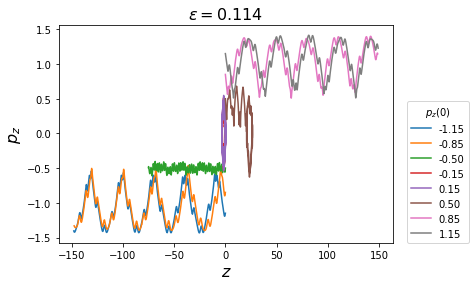

In [ ]:
for i in range(len(zz)):
  plt.plot(zz[i], ppz[i], label="%1.2f"%(pzz[i]))
plt.xlabel("$z$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 0.114$",fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

Looks like the brown curve with initial condition of $p_z (0) = 0.50$ has most change from its initial $p_z$

The islands are very close to eachother. 

The initial conditions for non-stochastic seems to be anything other condition that is not $p_z (0) = 0.50$

## 2h

Now $\epsilon$ is varied  until all orbits are stochastic. 

I will use $epsilon = 0.25 $ and $ 0.4$

In [ ]:
dt = 10**-4
N = 1500000
tmax = (N-1)*dt
t = np.linspace(0, tmax, N)
tspan = (0.0,tmax)
# Initial particle position and velocity.

pzz = [-1.15, -0.85, -0.5, -0.15, 0.15, 0.50, 0.85, 1.15]
eps = [0.25, 0.4]

results = []
resultse = []

for e in eps:
  for pzzz in pzz:

    z0, phi0, pz0, rho0 = (0, 0,pzzz, 1.48)

    X = (z0, phi0, pz0, rho0)
    results.append( solve_ivp(Stoch, tspan, X,method='LSODA',t_eval=t, args=[e]))
  
  resultse.append(results)
  results = []

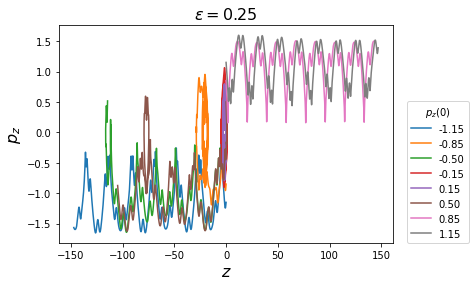

In [ ]:
zz = [resultse[0][i].y[0] for i in range(len(resultse[0]))]
pphi = [resultse[0][i].y[1] for i in range(len(resultse[0]))]
ppz = [resultse[0][i].y[2] for i in range(len(resultse[0]))]
rrho = [resultse[0][i].y[3] for i in range(len(resultse[0]))]

for i in range(len(zz)):
  plt.plot(zz[i], ppz[i], label="%1.2f"%(pzz[i]))
plt.xlabel("$z$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 0.25$",fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

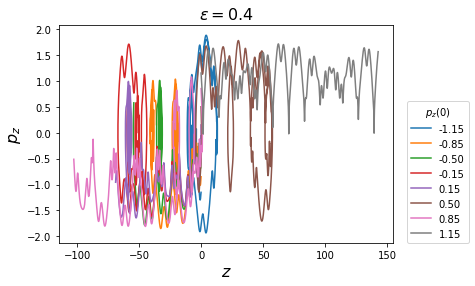

In [ ]:
zz = [resultse[1][i].y[0] for i in range(len(resultse[1]))]
pphi = [resultse[1][i].y[1] for i in range(len(resultse[1]))]
ppz = [resultse[1][i].y[2] for i in range(len(resultse[1]))]
rrho = [resultse[1][i].y[3] for i in range(len(resultse[1]))]

for i in range(len(zz)):
  plt.plot(zz[i], ppz[i], label="%1.2f"%(pzz[i]))
plt.xlabel("$z$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 0.4$",fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

It looks like $\epsilon = 0.4$ has purely stochastic orbits. 

#2i.i

According to equation (14), the trapping width is: 

$$\begin{align}
w_L = 4 \left| e \Phi_0 \:  J_L(k_\perp \rho)/m \right|^{1/2}
\end{align}$$


Thus increasing $\rho$ decreases the average value for $J_L(k_\perp \rho)$ as shown in the plot below:

Text(0, 0.5, '$J_\\nu$')

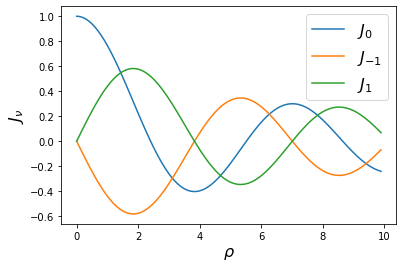

In [ ]:
r = np.arange(0,10,0.1)
plt.plot(r,sp.jv(0,r), label="$J_0$")
plt.plot(r,sp.jv(-1,r), label="$J_{-1}$")
plt.plot(r,sp.jv(1,r), label="$J_1$")
plt.legend(fontsize=16)
plt.xlabel("$\\rho$",fontsize=16)
plt.ylabel("$J_\\nu$",fontsize=16)

Thus decreasing the gyroradius $\rho$ should increase the width of the islands. Additionally, one can see that we can no longer just use equation (29) because the bessel function amplitude are not approximately equal like in the large $\rho$ case. 

## **2i.ii**

In this case, the bessel function value is much different for each $L$, therefore we have to use equation (28):

$$\begin{align}
2 \left| e \Phi_0/m \right|^{1/2} \left[ \left| J_L(k_\perp \rho)  \right|^{1/2} + \left| J_{L+1}(k_\perp \rho)  \right|^{1/2}\right] > \left( \Omega/k_z \right)
\end{align}$$


Which we can write in terms of $\epsilon$:


$$\begin{align}
\epsilon > \frac{1}{4 \left[ \left| J_L(k_\perp \rho)  \right|^{1/2} + \left| J_{L+1}(k_\perp \rho)  \right|^{1/2}\right]^2 }
\end{align}$$


Therefore it's clear that decreasing $\rho$ will increase $J_L$ and thus increase the Chirinkov criterion for $\epsilon$ .

In [ ]:
L = [-2,-1,0,1,2,3]
1/4/(np.abs(sp.jv(L[:-1],0.2))**0.5 + np.abs(sp.jv(L[1:],0.2))**0.5 )**2

array([ 1.67763312,  0.1455819 ,  0.1455819 ,  1.67763312, 35.8678654 ])

The lowest value we get is for $\epsilon > 0.1455819$ at $\rho = 0.2$. COmpare ethis to $\epsilon > 0.1126$ at $\rho = 1.48$

#2i.iii

Using $\rho = 0.2$ we can now find the particle orbits and check if the Chirikov criterion $\epsilon$ respects what was previously calculated. 

We will use $\epsilon = 0.12, \: 0.146, \: 1.69$ 

So that we can hit right below the lowest $\epsilon$ and right above it and the next highest. 

In [ ]:
dt = 10**-4
N = 1000000
tmax = (N-1)*dt
t = np.linspace(0, tmax, N)
tspan = (0.0,tmax)
# Initial particle position and velocity.

#pzz = [-1.15*1.48/0.2, -0.85*1.48/0.2, -0.5*1.48/0.2, -0.15*1.48/0.2, 0.15*1.48/0.2, 0.50*1.48/0.2, 0.85*1.48/0.2, 1.15*1.48/0.2]
pzz = np.array([-1.15, -0.85, -0.5, -0.15, 0.15, 0.50, 0.85, 1.15])+0.15
eps = [0.12, 0.146, 1.69]

results = []
resultse = []

for e in eps:
  for pzzz in pzz:

    z0, phi0, pz0, rho0 = (0, 0,pzzz, 0.2)

    X = (z0, phi0, pz0, rho0)
    results.append( solve_ivp(Stoch, tspan, X,method='LSODA',t_eval=t, args=[e]))
  
  resultse.append(results)
  results = []

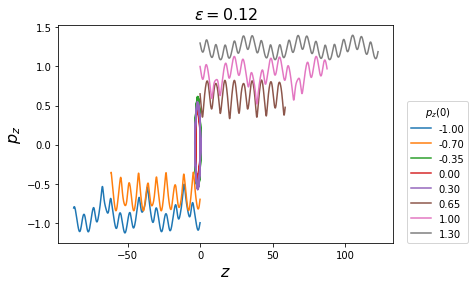

In [ ]:
zz = [resultse[0][i].y[0] for i in range(len(resultse[0]))]
pphi = [resultse[0][i].y[1] for i in range(len(resultse[0]))]
ppz = [resultse[0][i].y[2] for i in range(len(resultse[0]))]
rrho = [resultse[0][i].y[3] for i in range(len(resultse[0]))]

for i in range(len(zz)):
  plt.plot(zz[i], ppz[i], label="%1.2f"%(pzz[i]))
plt.xlabel("$z$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 0.12$",fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

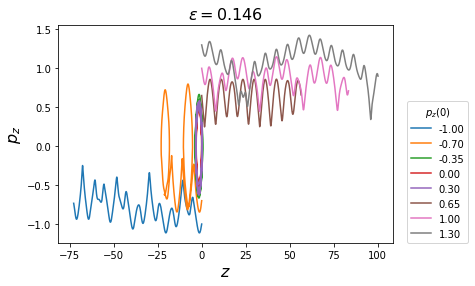

In [ ]:
a=1
zz = [resultse[a][i].y[0] for i in range(len(resultse[a]))]
pphi = [resultse[a][i].y[1] for i in range(len(resultse[a]))]
ppz = [resultse[a][i].y[2] for i in range(len(resultse[a]))]
rrho = [resultse[a][i].y[3] for i in range(len(resultse[a]))]

for i in range(len(zz)):
  plt.plot(zz[i], ppz[i], label="%1.2f"%(pzz[i]))
plt.xlabel("$z$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 0.146$",fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")

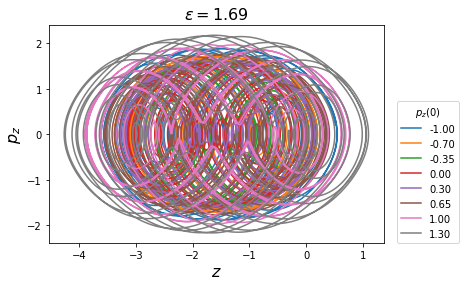

In [ ]:
a=2
zz = [resultse[a][i].y[0] for i in range(len(resultse[a]))]
pphi = [resultse[a][i].y[1] for i in range(len(resultse[a]))]
ppz = [resultse[a][i].y[2] for i in range(len(resultse[a]))]
rrho = [resultse[a][i].y[3] for i in range(len(resultse[a]))]

for i in range(len(zz)):
  plt.plot(zz[i], ppz[i], label="%1.2f"%(pzz[i]))
plt.xlabel("$z$", fontsize = 16)
plt.ylabel("$p_z$", fontsize = 16)
plt.title("$\epsilon = 1.69$",fontsize=16)
plt.legend(loc=(1.04,0),title="$p_z(0)$")